Analyze size of multiple gels via precomputed "size" files making it faster to execute the analysis script.

In [1]:
import sys

sys.path.append("../")

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from config import Config
from utils import GelDir

In [3]:
def extract_timestep(p) -> int:
    p = Path(p)
    return int(p.stem.split("_")[-1])

def extract_gel_dir(p) -> str:
    p = str(p)
    i = p.find("/run_")
    j = i + 1 + (p[i+1:]).find("/")
    return p[i+1:j]

In [4]:
def read_dataframe() -> pd.DataFrame:
    precomp_path = Path("../../data/processed/radii_prod4.csv")
    assert precomp_path.exists()
    size_df = pd.read_csv(precomp_path, index_col=False)
    # size_df.columns = ["file_path", "hydro_radius"]
    size_df["timestep"] = [extract_timestep(p) for p in size_df["file_path"]]
    size_df["gel_dir"] = [extract_gel_dir(p) for p in size_df["file_path"]]
    size_df["state"] = ["MMGel" if "mmgel_eq" in p else "Gel" for p in size_df["file_path"]]


    # size_df["seed"] = [extract_timestep(p) for p in size_df["file_path"]]
    # for i, p in enumerate(size_df["file_path"]):
    #     gel_dir_path = GelDir.from_inner(p).path
    #     config = Config.from_file(gel_dir_path / "config.json")
    #     size_df.loc[i, "seed"] = config.seed
    # size_df = size_df.sort_values(by=["seed", "timestep"])

    size_df = size_df.sort_values(by=["gel_dir", "timestep"])

    return size_df

In [ ]:
size_df = read_dataframe()
size_df

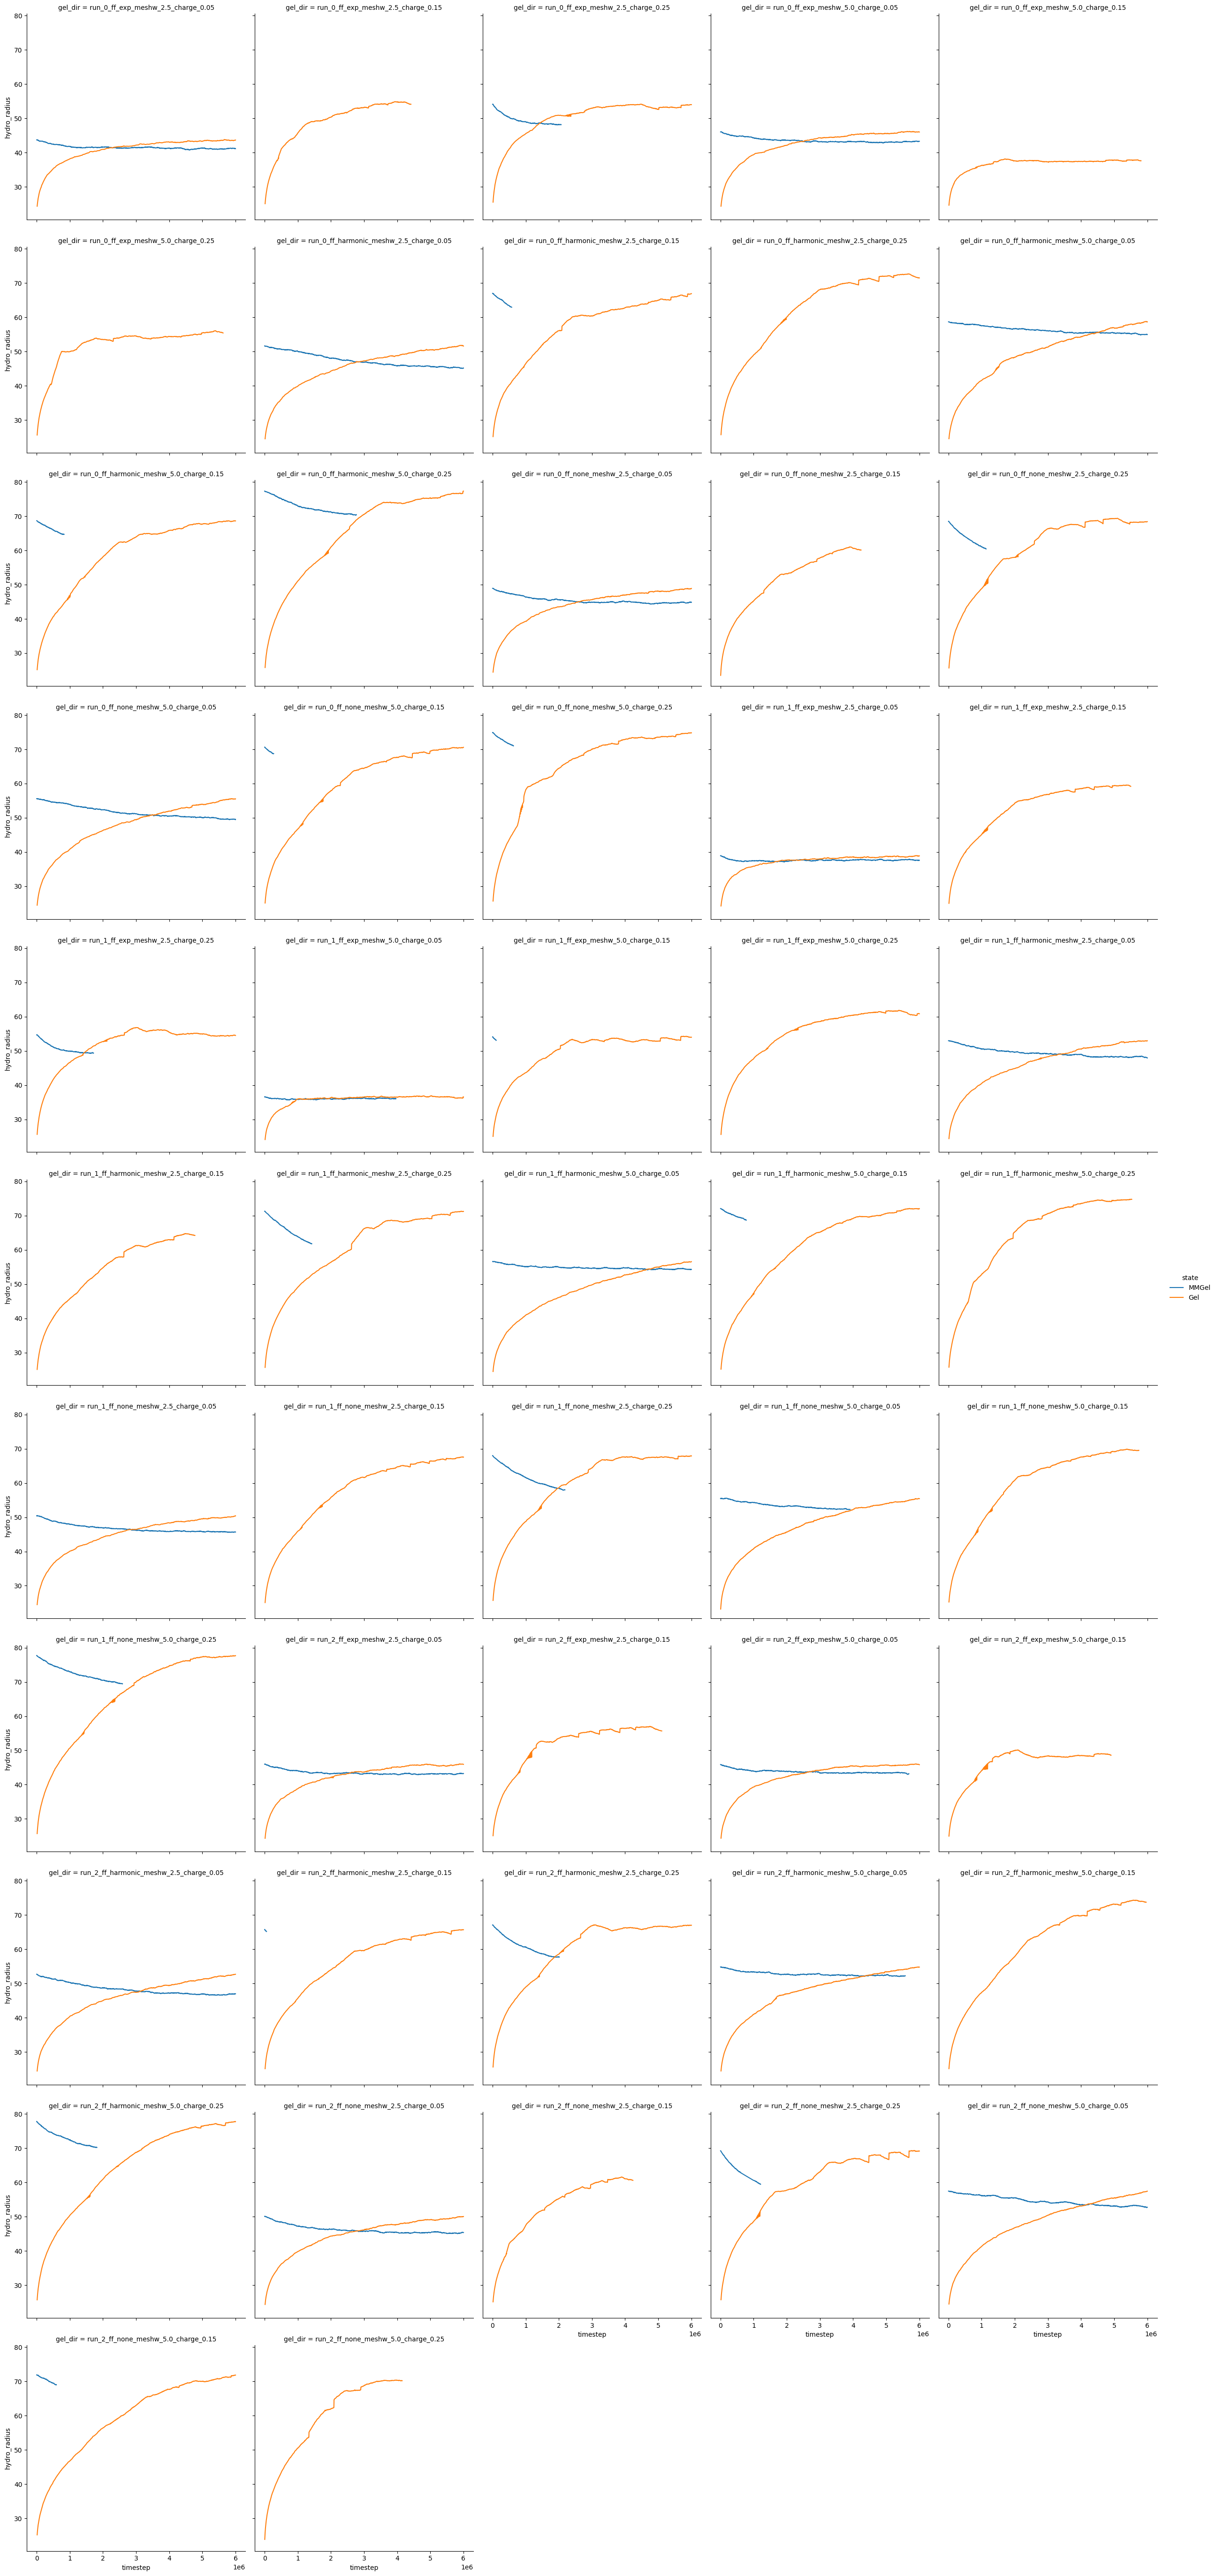

In [6]:
sns.relplot(size_df, kind="line", col="gel_dir", x="timestep", y="hydro_radius", hue="state", col_wrap=5)
plt.show()

In [18]:
size_df2 = size_df.copy()
size_df2["timestep"] = [row["timestep"] + (0 if row["state"] == "Gel" else 6 * 10**6) for _, row in size_df2.iterrows()]

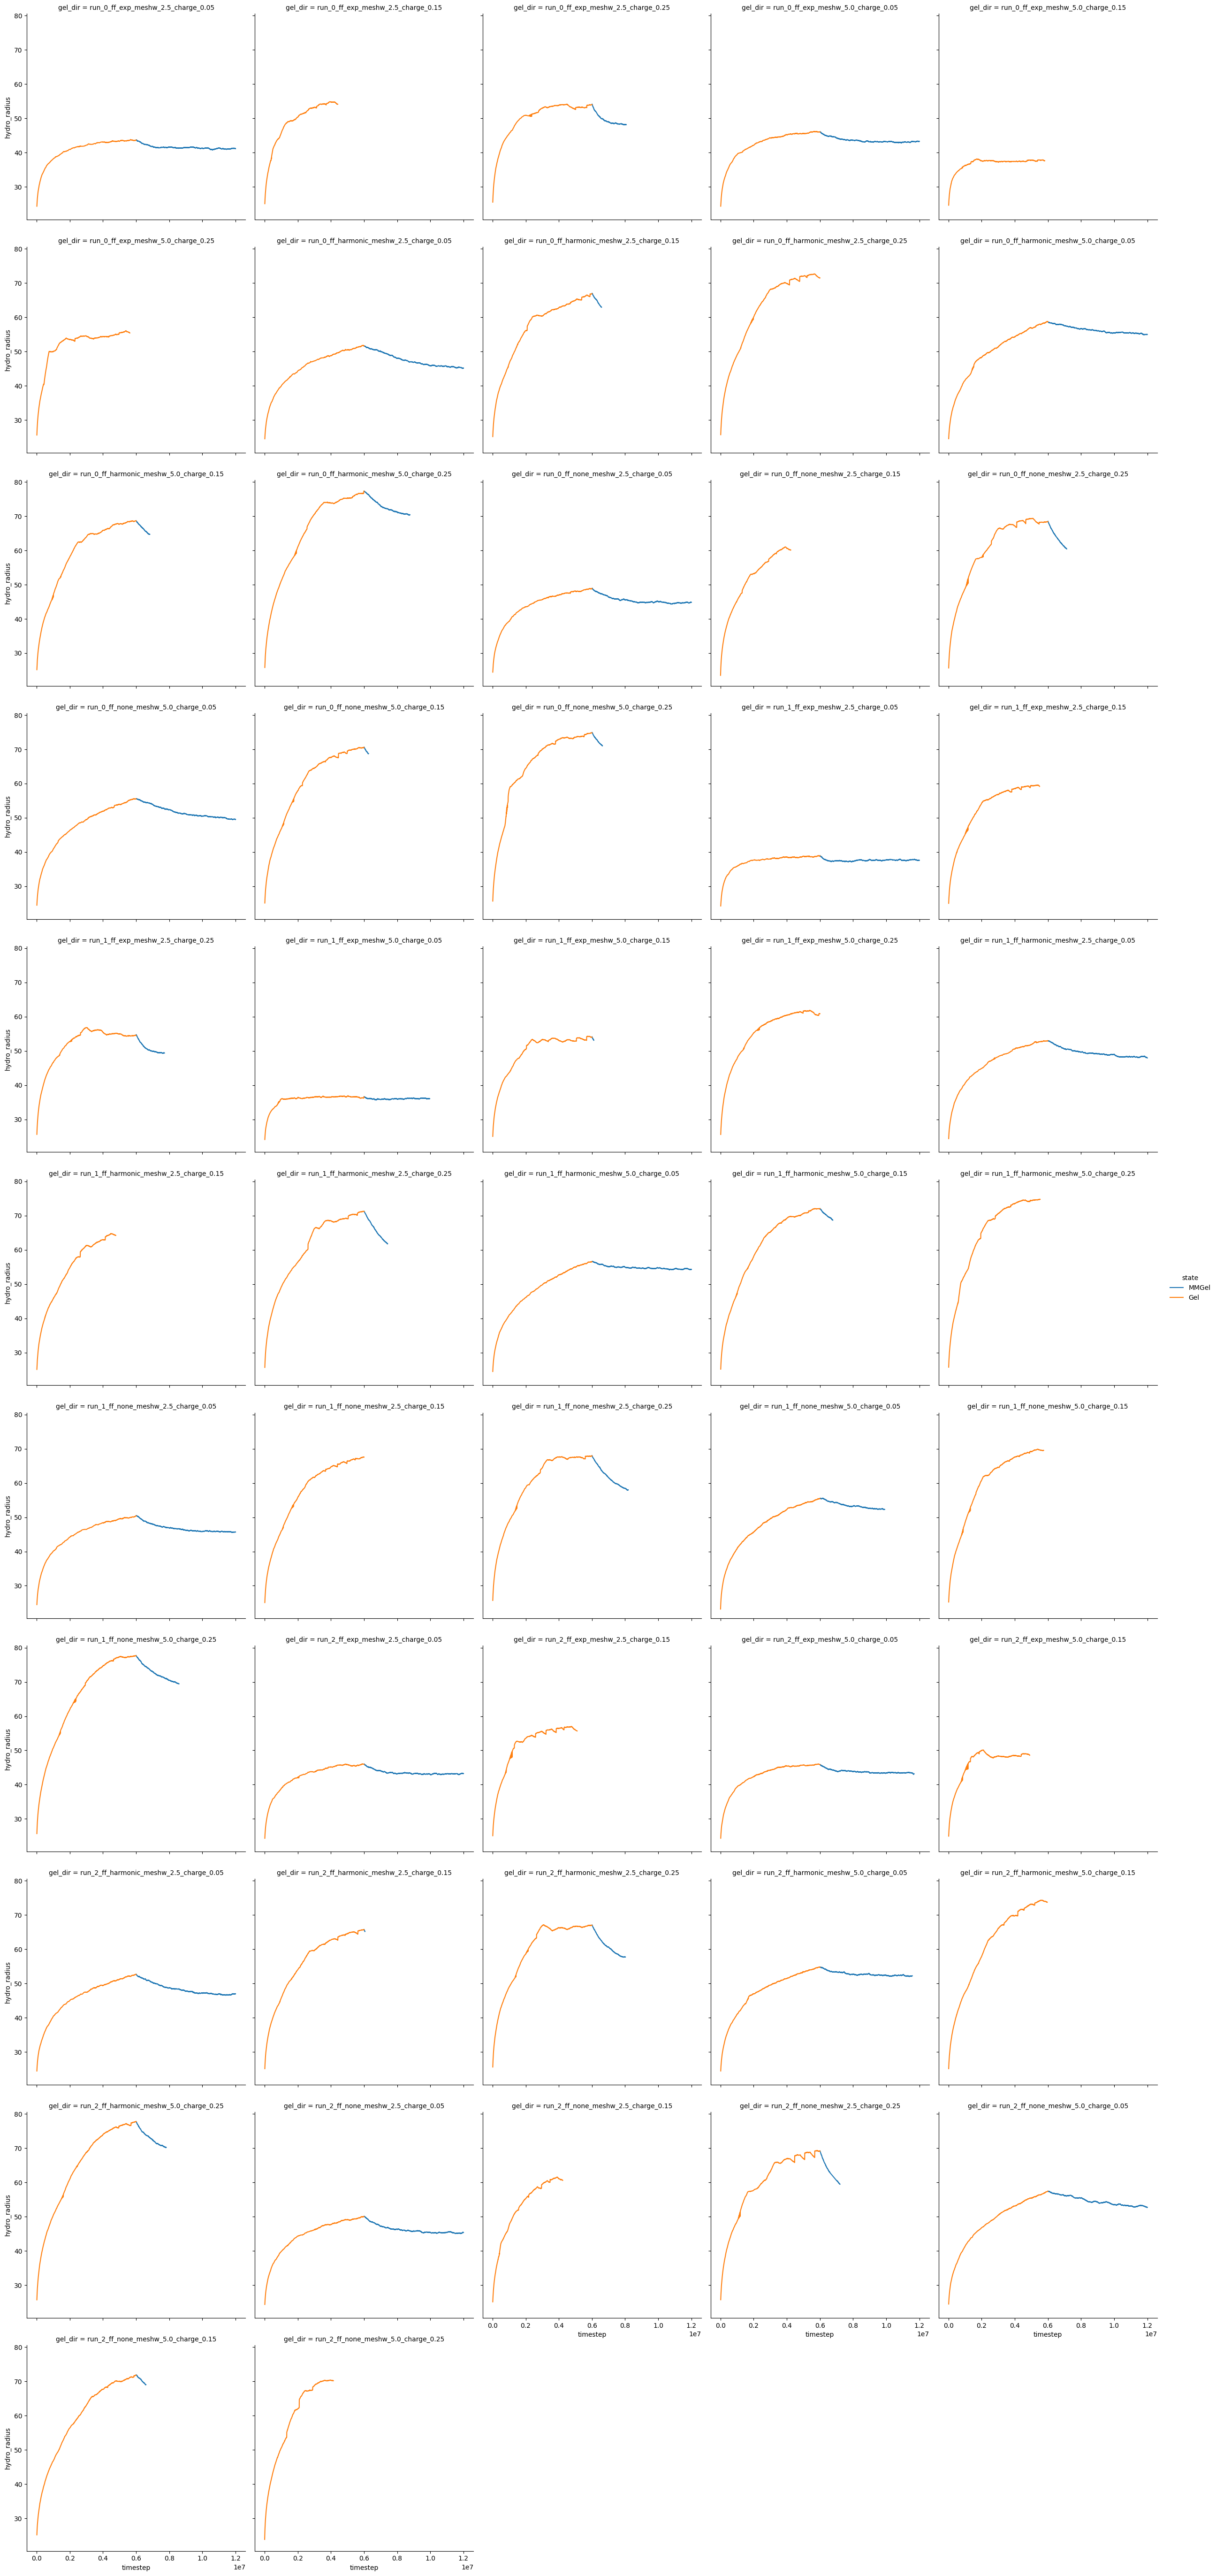

In [20]:
sns.relplot(size_df2, kind="line", col="gel_dir", x="timestep", y="hydro_radius", hue="state", col_wrap=5)
plt.show()

In [7]:
selected_gel_dir = "run_1_ff_harmonic_meshw_2.5_charge_0.05"
sub_size_df = size_df[(size_df["gel_dir"] == selected_gel_dir)]
# sub_size_df = sub_size_df[(sub_size_df["timestep"] > 1.0e6) * (sub_size_df["timestep"] < 1.5e6) ]
sub_size_df = sub_size_df.sort_values(by="timestep")
# sub_size_df = sub_size_df[::10]
# tmp_df = sub_size_df.copy()
# tmp_df["file_path"] = [p[30:] for p in tmp_df["file_path"]]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'max_colwidth', -1):
#     display(tmp_df)

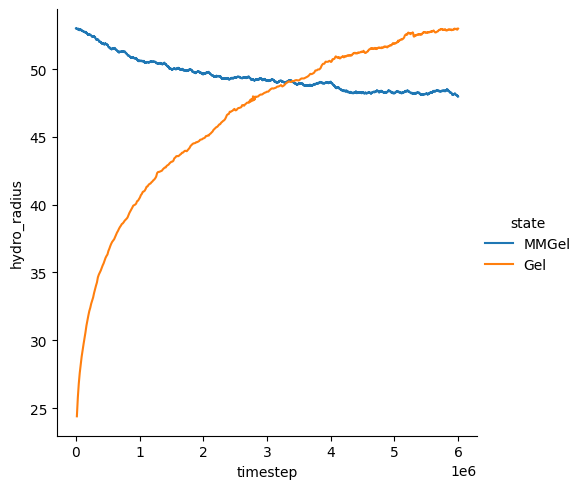

In [8]:
sns.relplot(sub_size_df, kind="line", x="timestep", y="hydro_radius", hue="state")
plt.show()